Variables, lists, tuples, dictionaries, sets, arrays, pandas Series and pandas
DataFrames offer only temporary data storage. The data is lost when a local variable
“goes out of scope” or when the program terminates. Files provide longterm
retention
of typically large amounts of data, even after the program that created the data
terminates, so data maintained in files is persistent. Computers store files on secondary
storage devices, including solidstate
drives, hard disks and more. In this chapter, we
explain how Python programs create, update and process data files.

# Files

Python views a text file as a sequence of characters and a binary file (for images,
videos and more) as a sequence of bytes.

For each file you open, Python creates a file object that you’ll use to interact with the
file.

Every operating system provides a mechanism to denote the end of a file. Some
represent it with an endoffile
marker, while others
might maintain a count of the total characters or bytes in the file. Programming
languages generally hide these operatingsystem
details from you.

## Standard File Objects

When a Python program begins execution, it creates three standard file objects:
* sys.stdin—the standard input file object
* sys.stdout—the standard output file object, and
* sys.stderr—the standard error file object.

# Text-file processing

##  Writing to a Text File; Introducing the `with` Statement 

In [ ]:
with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')

In [ ]:
# macOS/Linux Users: View file contents
!cat accounts.txt

In [ ]:
# Windows Users: View file contents
!more accounts.txt

    

### The `with` Statement


Python’s
`with` statement:
* acquires a resource (in this case, the file object for accounts.txt) and assigns its
corresponding object to a variable (accounts in this example),
* allows the application to use the resource via that variable, and
* calls the resource object’s close method to release the resource when program
control reaches the end of the with statement’s suite.

### Built-In Function `open` 


The builtin
open function opens the file accounts.txt and associates it with a file
object. The mode argument specifies the fileopen
mode, indicating whether to open
a file for reading from the file, for writing to the file or both. The mode 'w' opens the
file for writing, creating the file if it does not exist. If you do not specify a path to the
file, Python creates it in the current folder. Be careful—opening a file for writing
deletes all the existing data in the file. By convention, the .txt file extension
indicates a plain text file.

### Writing to the File 


The with statement assigns the object returned by open to the variable accounts in
the as clause. In the with statement’s suite, we use the variable accounts to interact
with the file. In this case, we call the file object’s write method five times to write five
records to the file, each as a separate line of text ending in a newline. At the end of the
with statement’s suite, the with statement implicitly calls the file object’s close
method to close the file.

### Contents of `accounts.txt` File 

After executing the previous snippet, your directory contains the file
accounts.txt.
On colab, click on the folder icon on the right menu to see the file.

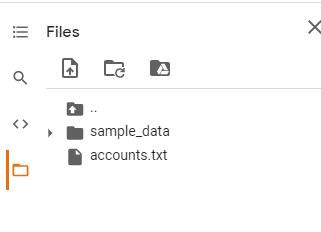

##  Reading Data from a Text File

In [ ]:
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')
        

### File Method `readlines`

The file object’s readlines method also can be used to read an entire text file. The
method returns each line as a string in a list of strings. For small files, this works well,
but iterating over the lines in a file object, as shown above, can be more efficient.
Calling readlines for a large file can be a timeconsuming
operation, which must
complete before you can begin using the list of strings. Using the file object in a for
statement enables your program to process each text line as it’s read.

### Seeking to a Specific File Position

While reading through a file, the system maintains a fileposition
pointer
representing the location of the next character to read. Sometimes it’s necessary to
process a file sequentially from the beginning several times during a program’s
execution. Each time, you must reposition the fileposition
pointer to the beginning of
the file, which you can do either by closing and reopening the file, or by calling the file
object’s seek method, as in
`file_object.seek(0)`
The latter approach is faster.

#  Updating Text Files

If the name 'White' needs to be changed to 'Williams' in
accounts.txt, the old name cannot simply be overwritten.

### Updating `accounts.txt` 

In [ ]:
accounts = open('accounts.txt', 'r')

In [ ]:
temp_file = open('temp_file.txt', 'w')

In [ ]:
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')
                    

### `os` Module File Processing Functions

In [ ]:
import os

In [ ]:
os.remove('accounts.txt')

In [ ]:
os.rename('temp_file.txt', 'accounts.txt')

In [ ]:
# macOS/Linux Users: View file contents
!cat accounts.txt

In [ ]:
# Windows Users: View file contents
!more accounts.txt

#  Serialization with JSON 

Many libraries we use to interact with cloud-based
services, such as Twitter and others, communicate with your applications via JSON objects. JSON
(JavaScript Object Notation) is a text-based,
humanand-computer-readable,
datai-nterchange
format used to represent objects as collections of name–value pairs.

### JSON Data Format

JSON objects are similar to Python dictionaries. Each JSON object contains a commaseparated
list of property names and values, in curly braces:

`{"account": 100, "name": "Jones", "balance": 24.98}`

JSON also supports arrays which, like Python lists, are commaseparated
values in
square brackets. For example, the following is an acceptable JSON array of numbers:

`[100, 200, 300]`

Values in JSON objects and arrays can be:
* strings in double quotes (like "Jones"),
*  numbers (like 100 or 24.98),
* JSON Boolean values (represented as true or false in JSON),
* null (to represent no value, like None in Python),
* arrays (like [100, 200, 300]), and
* other JSON objects.

### Python Standard Library Module `json` 

The json module enables you to convert objects to JSON (JavaScript Object
Notation) text format. This is known as **serializing** the data.

In [ ]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

### Serializing an Object to JSON

The json module’s `dump`
function serializes the dictionary accounts_dict into the file.

In [ ]:
import json

In [ ]:
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

Check accounts.json content file.



### Deserializing the JSON Text

The json module’s load function reads the entire JSON contents of its file object
argument and converts the JSON into a Python object. This is known as **deserializing**
the data.

In [ ]:
with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)

In [ ]:
accounts_json

In [ ]:
accounts_json['accounts']

In [ ]:
accounts_json['accounts'][0]

In [ ]:
accounts_json['accounts'][1]

### Displaying the JSON Text

The json module’s `dumps` function (dumps is short for “dump string”) returns a
Python string representation of an object in JSON format. Using `dumps` with `load`, you
can read the JSON from the file and display it in a nicely indented format—sometimes
called “pretty printing” the JSON. When the dumps function call includes the indent
keyword argument, the string contains newline characters and indentation for pretty
printing—you also can use indent with the dump function when writing to a file.

In [ ]:
with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))
    

# Additional notes regarding files

The following list summarizes the various `fileopen`
modes for text files, including the
modes for reading and writing we’ve introduced. The writing and appending modes
create the file if it does not exist. The reading modes raise a FileNotFoundError if
the file does not exist. Each textfile
mode has a corresponding binaryfile
mode
specified with b, as in 'rb' or 'wb+'.

* 'r'
Open a text file for reading. This is the default if you do not specify
the fileopen
mode when you call open.
* 'w' Open a text file for writing. Existing file contents are deleted.
* 'a' Open a text file for appending at the end, creating the file if it does
not exist. New data is written at the end of the file.
* 'r+' Open a text file reading and writing.
* 'w+' Open a text file reading and writing. Existing file contents are deleted.
* 'a+' Open a text file reading and appending at the end. New data is
written at the end of the file. If the file does not exist, it is created.

## Other File Object Methods

* For a text file, the `read` method returns a string containing the number of
characters specified by the method’s integer argument. For a binary file, the method
returns the specified number of bytes. If no argument is specified, the method
returns the entire contents of the file.
* The `readline` method returns one line of text as a string, including the newline
character if there is one. This method returns an empty string when it encounters
the end of the file.
* The `writelines` method receives a list of strings and writes its contents to a file.

# Handling Exceptions

Various types of exceptions can occur when you work with files, including:
* A `FileNotFoundError` occurs if you attempt to open a non-existent
file for
reading with the 'r' or 'r+' modes.
* A `PermissionsError` occurs if you attempt an operation for which you do not
have permission. This might occur if you try to open a file that your account is not
allowed to access or create a file in a folder where your account does not have
permission to write, such as where your computer’s operating system is stored.
* A `ValueError` (with the error message 'I/O operation on closed file.')
occurs when you attempt to write to a file that has already been closed.

##  Division by Zero and Invalid Input

Attempting to divide by 0 results in a `ZeroDivisionError`.

### Division By Zero  

In [ ]:
10 / 0 

In this case, the interpreter is said to raise an exception of type
`ZeroDivisionError`.

### Invalid Input

The `int` function raises a `ValueError`
if you attempt to convert to an integer a string (like 'hello') that does not represent a number.

In [ ]:
value = int(input('Enter an integer: '))

##  `try` Statements

Try to run the following code multiple times by provding zeros or string inputs.

In [ ]:
# dividebyzero.py
"""Simple exception handling example."""

while True:
    # attempt to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError:  # tried to convert non-numeric value to int
        print('You must enter two integers\n')
    except ZeroDivisionError:  # denominator was 0
        print('Attempted to divide by zero\n')
    else:  # executes only if no exceptions occur
        print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
        break  # terminate the loop

### `try` Clause


Python uses `try` statements to enable exception handling. The try
statement’s try clause begins with keyword try, followed by a colon (:)
and a suite of statements that might raise exceptions.

### `except` Clause


A try clause may be followed by one or more except clauses
that immediately follow the try clause’s suite. These also are known as exception
handlers. Each except clause specifies the type of exception it handles. In this
example, each exception handler just displays a message indicating the problem that
occurred.

### `else` Clause


After the last except clause, an optional else clause specifies code that
should execute only if the code in the try suite did not raise exceptions. If no
exceptions occur in this example’s try suite, line 15 displays the division result and line
16 terminates the loop.

#  finally Clause


Operating systems typically can prevent more than one program from manipulating a
file at once. When a program finishes processing a file, the program should close it to
release the resource so other programs can access it. Closing the file helps prevent a
**resource leak**.

### The `finally` Clause of the `try` Statement


A try statement may have a finally clause after any except clauses or the else
clause. The finally clause is guaranteed to execute.

### Example

In [ ]:
try:
    print('try suite with no exceptions raised')
except:
    print('this will not execute')
else:
    print('else executes because no exceptions in the try suite')
finally:  
    print('finally always executes')
    

In [ ]:
try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else:
    print('else will not execute because an exception occurred')
finally:  
    print('finally always executes')
    

### Combining `with` Statements and `try`…`except` Statements 

In [ ]:
open('gradez.txt')

In [ ]:
try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:  
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}')
except FileNotFoundError:
    print('The file name you specified does not exist')
    

# Explicitly raising an exception

You’ve seen various exceptions raised by your Python code. Sometimes you might need
to write functions that raise exceptions to inform callers of errors that occur. The
raise statement explicitly raises an exception. The simplest form of the raise
statement is

`raise ExceptionClassName`

The raise statement creates an object of the specified exception class. Optionally, the
exception class name may be followed by parentheses containing arguments to
initialize the exception object—typically to provide a custom error message string. Code
that raises an exception first should release any resources acquired before the exception
occurred. In the next section, we’ll show an example of raising an exception.

# Stack Unwinding and Tracebacks

In [ ]:
def function1():
    function2()
    

In [ ]:
def function2():
    raise Exception('An exception occurred')

In [ ]:
function1()

### Traceback Details


The traceback shows the type of exception that occurred (Exception) followed by the
complete function call stack that led to the raise point. The stack’s bottom function call
is listed first and the top is last.

### Stack Unwinding


When an exception is not caught in a given function, stack unwinding
occurs.

### Tip for Reading Tracebacks


Sometimes those functions and methods raise exceptions. When reading a
traceback, start from the end of the traceback and read the error message first. Then,
read upward through the traceback, looking for the first line that indicates code you
wrote in your program. Typically, this is the location in your code that led to the
exception.

### Exceptions in finally Suites

Raising an exception in a finally suite can lead to subtle, hardtofind
problems. If
an exception occurs and is not processed by the time the finally suite executes, stack
unwinding occurs. If the finally suite raises a new exception that the suite does not
catch, the first exception is lost, and the new exception is passed to the next enclosing
try statement. For this reason, a finally suite should always enclose in a try
statement any code that may raise an exception, so that the exceptions will be
processed within that suite.

# Working with CSV files

CSV (commaseparated
values) is a particularly popular file format.

##  Python Standard Library Module `csv` 


The csv module provides functions for working with CSV files.

### Writing to a CSV File

In [ ]:
import csv

In [ ]:
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])
    

The .csv file extension indicates a CSVformat
file. The csv module’s writer
function returns an object that writes CSV data to the specified file object. Each call to
the writer’s writerow method receives an iterable to store in the file. Here we’re
using lists. By default, writerow delimits values with commas, but you can specify
custom delimiters.

CSV files generally do not contain spaces after commas, but some people use them to
enhance readability. The writerow calls above can be replaced with one writerows
call that outputs a commaseparated
list of iterables representing the records.

### Reading from a CSV File

In [ ]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:  
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')
        

The csv module’s reader function returns an object that reads CSVformat
data
from the specified file object. Just as you can iterate through a file object, you can
iterate through the reader object one record of commadelimited
values at a time.

### Caution: Commas in CSV Data Fields


Be careful when working with strings containing embedded commas. Programs that read CSV files typically expect every record to have the same number of
fields; otherwise, problems occur.

##  Reading CSV Files into Pandas `DataFrame`s 


### Datasets

The popular Rdatasets repository
provides links to over 1100 free datasets in commaseparated
values (CSV) format.

A commonly used machinelearning
dataset for beginners is the Titanic disaster
dataset, which lists all the passengers and whether they survived when the ship
Titanic struck an iceberg and sank April 14–15, 1912.


### Working with Locally Stored CSV Files 

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('accounts.csv', 
                 names=['account', 'name', 'balance'])

In [ ]:
df

In [ ]:
df.to_csv('accounts_from_dataframe.csv', index=False)

##  Reading the Titanic Disaster Dataset 


The Titanic disaster dataset is one of the most popular machinelearning
datasets. The
dataset is available in many formats, including CSV.

In [ ]:
import pandas### Loading the Titanic Dataset via a URL as pd

In [ ]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/' +
    'Rdatasets/csv/carData/TitanicSurvival.csv')
                      

### Viewing Some of the Rows in the Titanic Dataset

In [ ]:
pd.set_option('precision', 2)  # format for floating-point values

In [ ]:
titanic.head()

In [ ]:
titanic.tail()

### Customizing the Column Names

In [ ]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

In [ ]:
titanic.head()

##  Simple Data Analysis with the Titanic Disaster Dataset 

In [ ]:
titanic.describe()

In [ ]:
(titanic.survived == 'yes').describe()

##  Passenger Age Histogram
 

In [ ]:
%matplotlib inline

In [ ]:
histogram = titanic.hist()